In [ ]:
# 1 ANS:

''' Cloud Computing for Deep Learning
(a) Elasticity vs. Scalability:

Elasticity: Automatically adjusts resources based on demand.
Scalability: Expands resources to handle growing workloads.

(b) AWS SageMaker vs. Google Vertex AI vs. Azure ML Studio:

SageMaker: Strong AWS integration, supports GPUs/TPUs, good for automated training and deployment.
Vertex AI: Seamless with Google Cloud, AutoML, and TPU support, great for end-to-end ML.
Azure ML Studio: User-friendly, strong enterprise features, integrates well with Microsoft tools.'''

' Cloud Computing for Deep Learning\n(a) Elasticity vs. Scalability:\n\nElasticity: Automatically adjusts resources based on demand.\nScalability: Expands resources to handle growing workloads.\n\n(b) AWS SageMaker vs. Google Vertex AI vs. Azure ML Studio:\n\nSageMaker: Strong AWS integration, supports GPUs/TPUs, good for automated training and deployment.\nVertex AI: Seamless with Google Cloud, AutoML, and TPU support, great for end-to-end ML.\nAzure ML Studio: User-friendly, strong enterprise features, integrates well with Microsoft tools.'

In [1]:
import tensorflow as tf
import numpy as np

# Define the 5×5 input matrix
input_matrix = np.array([
    [1, 2, 3, 4, 5],
    [6, 7, 8, 9, 10],
    [11, 12, 13, 14, 15],
    [16, 17, 18, 19, 20],
    [21, 22, 23, 24, 25]
], dtype=np.float32).reshape(1, 5, 5, 1)  # Reshaped to 4D for TensorFlow (batch, height, width, channels)

# Define the 3×3 kernel
kernel = np.array([
    [1, 0, -1],
    [1, 0, -1],
    [1, 0, -1]
], dtype=np.float32).reshape(3, 3, 1, 1)  # Reshaped for TensorFlow (height, width, in_channels, out_channels)

# Convert to TensorFlow tensors
input_tensor = tf.constant(input_matrix, dtype=tf.float32)
kernel_tensor = tf.constant(kernel, dtype=tf.float32)

# Perform convolution operations with different stride and padding
def perform_convolution(stride, padding):
    conv_layer = tf.nn.conv2d(input_tensor, kernel_tensor, strides=[1, stride, stride, 1], padding=padding)
    return conv_layer.numpy().squeeze()  # Convert tensor to NumPy and remove single dimensions

# Compute outputs
output_valid_stride_1 = perform_convolution(1, 'VALID')
output_same_stride_1 = perform_convolution(1, 'SAME')
output_valid_stride_2 = perform_convolution(2, 'VALID')
output_same_stride_2 = perform_convolution(2, 'SAME')

# Print the output feature maps
print("Output with Stride = 1, Padding = 'VALID':\n", output_valid_stride_1)
print("\nOutput with Stride = 1, Padding = 'SAME':\n", output_same_stride_1)
print("\nOutput with Stride = 2, Padding = 'VALID':\n", output_valid_stride_2)
print("\nOutput with Stride = 2, Padding = 'SAME':\n", output_same_stride_2)

Output with Stride = 1, Padding = 'VALID':
 [[-6. -6. -6.]
 [-6. -6. -6.]
 [-6. -6. -6.]]

Output with Stride = 1, Padding = 'SAME':
 [[ -9.  -4.  -4.  -4.  13.]
 [-21.  -6.  -6.  -6.  27.]
 [-36.  -6.  -6.  -6.  42.]
 [-51.  -6.  -6.  -6.  57.]
 [-39.  -4.  -4.  -4.  43.]]

Output with Stride = 2, Padding = 'VALID':
 [[-6. -6.]
 [-6. -6.]]

Output with Stride = 2, Padding = 'SAME':
 [[ -9.  -4.  13.]
 [-36.  -6.  42.]
 [-39.  -4.  43.]]


Saving christoph-nolte-as1_CYaRREc-unsplash.jpg to christoph-nolte-as1_CYaRREc-unsplash.jpg
Image loaded successfully. Shape: (4500, 3600)


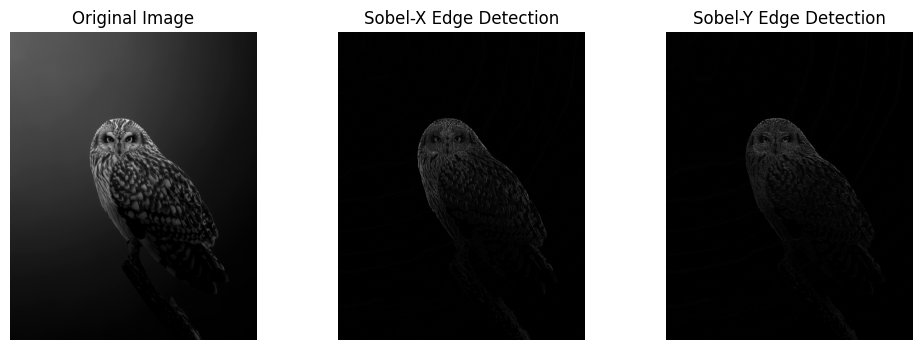

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# Upload an image manually from your local system (Download from Upscale/Unsplash)
uploaded = files.upload()  # Upload the image from local system

# Get the image filename
image_filename = list(uploaded.keys())[0]

# Read the uploaded image in grayscale
image = cv2.imread(image_filename, cv2.IMREAD_GRAYSCALE)

# Ensure the image is correctly loaded
if image is None:
    print("Error: Unable to load image. Please check the file format and try again.")
else:
    print("Image loaded successfully. Shape:", image.shape)

    # Apply Sobel filter for edge detection
    sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)  # Edge detection in x-direction
    sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)  # Edge detection in y-direction

    # Convert gradients to absolute values
    sobel_x = cv2.convertScaleAbs(sobel_x)
    sobel_y = cv2.convertScaleAbs(sobel_y)

    # Display the original image and edge-detected images
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 3, 1)
    plt.imshow(image, cmap='gray')
    plt.title("Original Image")
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(sobel_x, cmap='gray')
    plt.title("Sobel-X Edge Detection")
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(sobel_y, cmap='gray')
    plt.title("Sobel-Y Edge Detection")
    plt.axis('off')

    plt.show()

In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models, Input

# Task 1: Implement AlexNet
def build_alexnet(input_shape=(227, 227, 3), num_classes=10):
    model = models.Sequential([
        layers.Conv2D(96, (11, 11), strides=4, activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((3, 3), strides=2),
        layers.Conv2D(256, (5, 5), activation='relu', padding='same'),
        layers.MaxPooling2D((3, 3), strides=2),
        layers.Conv2D(384, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(384, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((3, 3), strides=2),
        layers.Flatten(),
        layers.Dense(4096, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(4096, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])

    return model

# Build and print the summary of AlexNet
alexnet_model = build_alexnet()
alexnet_model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 55, 55, 96)          │          34,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 27, 27, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 27, 27, 256)         │         614,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 13, 13, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 13, 13, 384)         │         885,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 13, 13, 384)         │       1,327,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 13, 13, 256)         │         884,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 4096)                │      37,752,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │          40,970 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 58,322,314 (222.48 MB)

 Trainable params: 58,322,314 (222.48 MB)

 Non-trainable params: 0 (0.00 B)